In [10]:
import sys
import os
import shutil
import re
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import transforms as T

from data_manager import rgbd_gradients_dataset, rgbd_gradients_dataloader
from functions import torch2np_u8
import plot

np.set_printoptions(threshold=sys.maxsize)
%matplotlib notebook

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [4]:
CWD             = os.getcwd()
DATASET_DIR     = os.path.join(CWD,'data/nyuv2')
print(DATASET_DIR)

/home/manor/cs236781-DeepLearning/project/data/nyuv2


In [5]:
IMAGE_SIZE = (64,64)
TRAIN_TEST_RATIO = 0.9
BATCH_SIZE=4
NUM_WORKERS=4

In [6]:
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize(IMAGE_SIZE),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

In [7]:
rgbd_grads_ds = rgbd_gradients_dataset(root=DATASET_DIR,transforms=tf)

[{'rgb': tensor([[[ 0.6863,  0.2706,  0.2627,  ...,  0.7804,  0.7804,  0.9294],
         [ 0.1686, -0.8039, -0.8196,  ...,  0.5451,  0.4196,  0.7569],
         [ 0.2627, -0.6157, -0.7176,  ...,  0.9451,  0.6549,  0.7098],
         ...,
         [ 0.1451, -0.8431, -0.8745,  ..., -0.3176, -0.3725,  0.4902],
         [ 0.2157, -0.7020, -0.7333,  ..., -0.3098, -0.3804,  0.4902],
         [ 0.6941,  0.3333,  0.3412,  ...,  0.4824,  0.4353,  0.7961]],

        [[ 0.6863,  0.2784,  0.2706,  ...,  0.7725,  0.7647,  0.9216],
         [ 0.1686, -0.8039, -0.8196,  ...,  0.4667,  0.3490,  0.7333],
         [ 0.2627, -0.6235, -0.7176,  ...,  0.9294,  0.5686,  0.6627],
         ...,
         [ 0.1451, -0.8588, -0.8824,  ..., -0.4196, -0.4667,  0.4510],
         [ 0.2000, -0.7333, -0.7647,  ..., -0.4039, -0.4745,  0.4431],
         [ 0.6863,  0.3176,  0.3176,  ...,  0.4588,  0.3961,  0.7725]],

        [[ 0.6784,  0.2549,  0.2392,  ...,  0.7882,  0.7647,  0.9216],
         [ 0.1373, -0.8745, -0.8824,

<IPython.core.display.Javascript object>


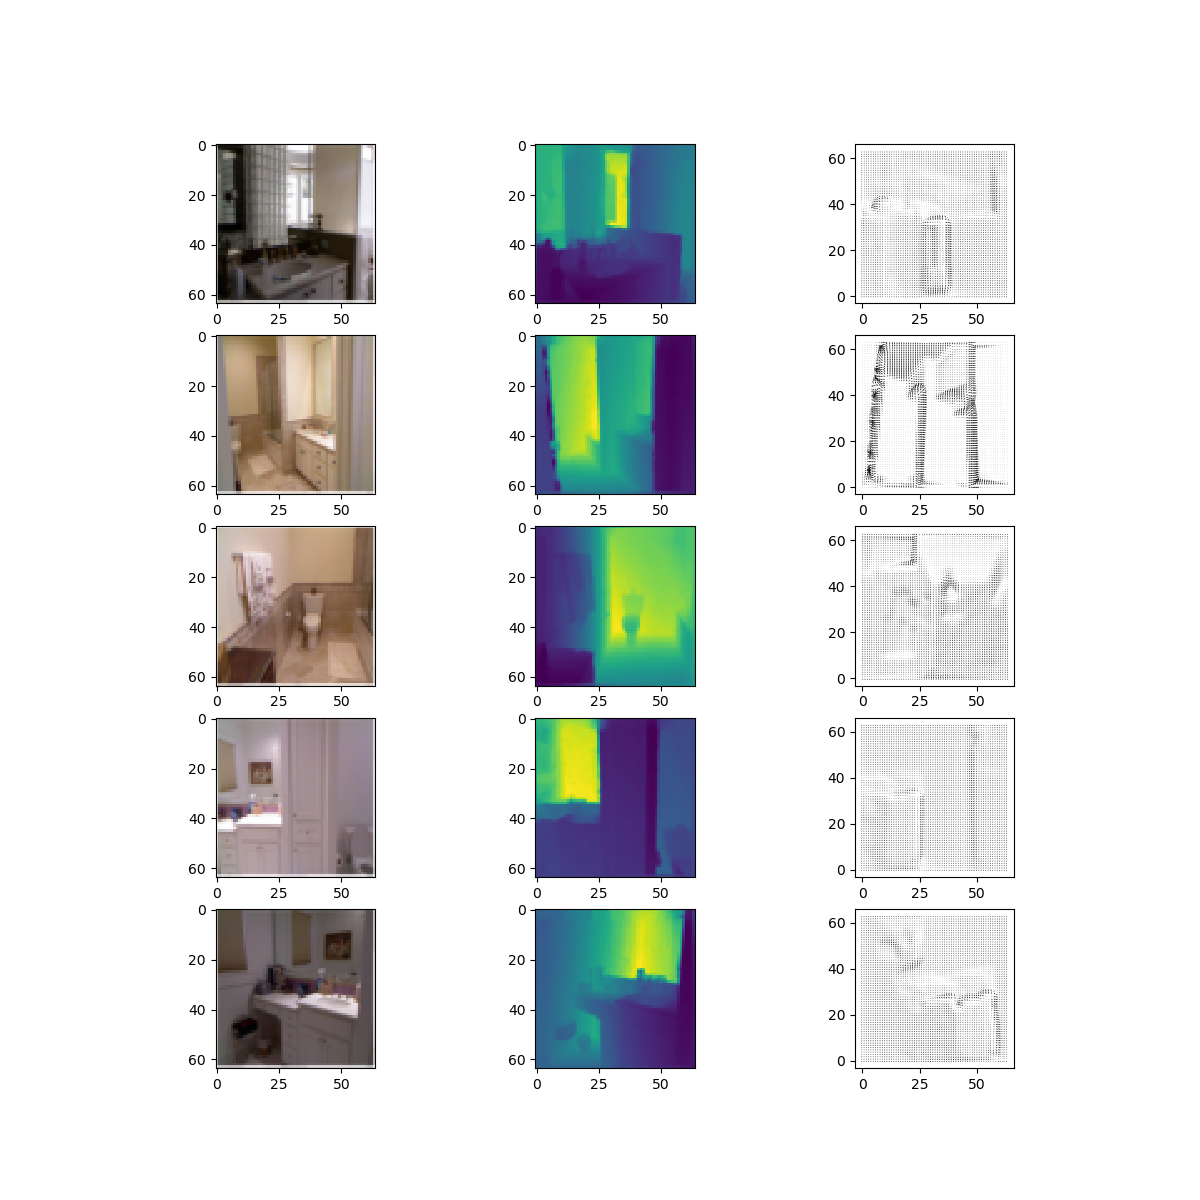

Found 1288 images in dataset folder.


In [12]:
_ = plot.rgbd_gradients_dataset_first_n(dataset=rgbd_grads_ds,n=5)
print(f'Found {len(rgbd_grads_ds)} images in dataset folder.')

In [9]:
dl_train,dl_test = rgbd_gradients_dataloader(root=DATASET_DIR,
                                             batch_size=BATCH_SIZE,
                                             num_workers=NUM_WORKERS,
                                             train_test_ration=TRAIN_TEST_RATIO, transforms=tf)